# Implementation of the SARSA algorithm

This algorithm takes what we know about value function estimation and applies
it to learning the action-value function.

![img](./imgs/sarsa.png)

From Sutton and Barto, 2018. Ch. 6.

In [1]:
# first, import necessary modules
import sys
import gym
import random
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# add your own path to the RL repo here
sys.path.append('/Users/wingillis/dev/reinforcement-learning')

from collections import defaultdict
from lib.envs.gridworld import GridworldEnv

In [2]:
sns.set_style('white')

In [3]:
# initialize the environment
shape = (5, 5)  # size of the gridworld
env = GridworldEnv(shape, n_goals=2)
env.seed(23)
random.seed(23)

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, n_actions):
  '''
  Creates an epsilon-greedy policy based on a given Q-function and epsilon.

  Args:
    Q: A dictionary that maps from state -> action-values.
      Each value is a numpy array of length nA (see below)
    epsilon: The probability to select a random action . float between 0 and 1.
    n_actions: Number of actions in the environment.

  Returns:
    A function that takes the observation as an argument and returns
    the probabilities for each action in the form of a numpy array of length nA.

  '''
  return policy_fn

In [5]:
def sarsa(env, num_episodes, gamma=1.0, alpha=0.5, epsilon=0.1):
  '''
  SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.

  Args:
    env: OpenAI environment.
    num_episodes: Number of episodes to run for.
    gamma: discount factor.
    alpha: TD learning rate.
    epsilon: Probability a random action will be sampled. Float betwen 0 and 1.

  Returns:
    A tuple (Q, stats).
    Q is the optimal action-value function, a dictionary mapping state -> action values.
    stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
  '''

  # The final action-value function.
  # A nested dictionary that maps state -> (action -> action-value).
  Q = defaultdict(lambda: np.zeros(env.nA))

  # Keeps track of useful statistics
  stats = dict(rewards=np.zeros(num_episodes), lengths=np.zeros(num_episodes))

  # The policy we're following
  policy = make_epsilon_greedy_policy(Q, epsilon, env.nA)

  for i_episode in range(num_episodes):
    # Print out which episode we're on, useful for debugging.
    if (i_episode + 1) % 50 == 0:
      print(f'\rEpisode {i_episode + 1}/{num_episodes}.', end='')
      sys.stdout.flush()

    # Reset the environment and pick the first action

    # take multiple steps in the env until you reach the goal
    for t in itertools.count():
      # take a step from the action picked above

      # pick the next action based on your current state

      # add cumulative reward to the statistics variable
      stats['rewards'][i_episode] += 

      # perform the TD update to the action-value function

      if done:
        stats['lengths'][i_episode] = t
        break

      # update your current action and current state

  return Q, stats

## Next steps

How might you improve the SARSA algorithm?

What happens to your agent's total reward or completion time if you set epsilon close to 1? Or close to 0?

## Reference results

In [6]:
Q, stats = sarsa(env, 1000, gamma=0.1, alpha=0.15)

Episode 1000/1000.

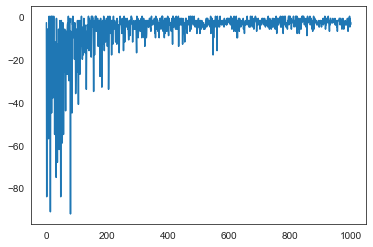

In [7]:
plt.plot(stats['rewards'])

Text(0.5, 0, 'episodes')

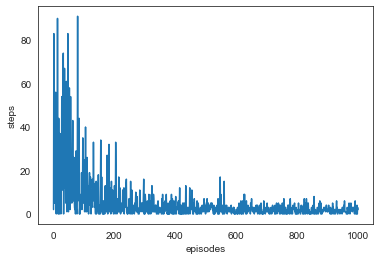

In [8]:
plt.plot(stats['lengths'])
plt.ylabel('steps')
plt.xlabel('episodes')

## Watch your policy reach the goal

In [15]:
import time
from IPython.display import clear_output

In [9]:
policy = make_epsilon_greedy_policy(Q, 0, env.nA)

In [35]:
n_steps = 40
position = env.reset()
for t in range(n_steps):
  action = np.argmax(policy(position))
  position, _, done, _ = env.step(action)
  clear_output()
  env.render('human')
  time.sleep(1)
  if done:
    break

T  o  o  o  o
o  o  o  o  o
o  o  o  o  o
o  o  o  o  o
o  o  o  o  x
